# Pandas4 - Visualization

In [1]:
import pandas as pd

## (1) Oslo city bike

**(1.1) Download the September 2022 city bike data here https://oslobysykkel.no/en/open-data/historical. Import the dataset.**<br> 
(The description of each column can be found on the same page.)

In [2]:
bikes_df = pd.read_csv("../dataset/oslo_bike.csv")
bikes_df.head(5)

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2022-09-01 03:04:31.178000+00:00,2022-09-01 03:13:01.298000+00:00,510,437,Sentrum Scene,ved Arbeidersamfunnets plass,59.915468,10.751141,583,Galgeberg,langs St. Halvards gate,59.907076,10.779164
1,2022-09-01 03:11:09.104000+00:00,2022-09-01 03:14:52.506000+00:00,223,578,Hallings gate,langs Dalsbergstien,59.922777,10.738655,499,Bjerregaards gate,ovenfor Fredrikke Qvams gate,59.925488,10.746058
2,2022-09-01 03:11:37.861000+00:00,2022-09-01 03:23:23.939000+00:00,706,421,Alexander Kiellands Plass,langs Maridalsveien,59.928067,10.751203,390,Saga Kino,langs Olav Vs gate,59.914240,10.732771
3,2022-09-01 03:13:00.843000+00:00,2022-09-01 03:17:17.639000+00:00,256,735,Oslo Hospital,ved trikkestoppet,59.903213,10.767344,465,Bjørvika,under broen Nylandsveien,59.909006,10.756180
4,2022-09-01 03:13:13.330000+00:00,2022-09-01 03:24:15.758000+00:00,662,525,Myraløkka Øst,ved Bentsenbrua,59.937205,10.760581,443,Sjøsiden ved trappen,Oslo S,59.910154,10.751981


**(1.2) Extract the date (month-date) from the column <code>started_at</code> and add it to a new column named <code>date</code>.**<br>
Example: 09-01<br>
Hint: string slicing

In [3]:
bikes_df["date"] = bikes_df.started_at.str[5:10]
bikes_df.head(5)

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,date
0,2022-09-01 03:04:31.178000+00:00,2022-09-01 03:13:01.298000+00:00,510,437,Sentrum Scene,ved Arbeidersamfunnets plass,59.915468,10.751141,583,Galgeberg,langs St. Halvards gate,59.907076,10.779164,09-01
1,2022-09-01 03:11:09.104000+00:00,2022-09-01 03:14:52.506000+00:00,223,578,Hallings gate,langs Dalsbergstien,59.922777,10.738655,499,Bjerregaards gate,ovenfor Fredrikke Qvams gate,59.925488,10.746058,09-01
2,2022-09-01 03:11:37.861000+00:00,2022-09-01 03:23:23.939000+00:00,706,421,Alexander Kiellands Plass,langs Maridalsveien,59.928067,10.751203,390,Saga Kino,langs Olav Vs gate,59.914240,10.732771,09-01
3,2022-09-01 03:13:00.843000+00:00,2022-09-01 03:17:17.639000+00:00,256,735,Oslo Hospital,ved trikkestoppet,59.903213,10.767344,465,Bjørvika,under broen Nylandsveien,59.909006,10.756180,09-01
4,2022-09-01 03:13:13.330000+00:00,2022-09-01 03:24:15.758000+00:00,662,525,Myraløkka Øst,ved Bentsenbrua,59.937205,10.760581,443,Sjøsiden ved trappen,Oslo S,59.910154,10.751981,09-01


**(1.3) Group the data by the column <code>date</code>. Calculate the total riding time for all trips per day.**<br>
Hint: Use column <code>duration</code> to get the riding time for each trip.

In [4]:
# solution-1
bikes_df.groupby("date").duration.sum()

date
09-01    5691770
09-02    4678134
09-03    3878819
09-04    2837144
09-05    5223129
09-06    5344201
09-07    5491826
09-08    4584650
09-09    4272447
09-10    3160091
09-11    3546991
09-12    3245268
09-13    3702078
09-14    4113486
09-15    4068346
09-16    4234733
09-17    4039576
09-18    2863087
09-19    3996365
09-20    4590365
09-21    4003633
09-22    3862054
09-23    1472687
09-24    2964446
09-25    2601028
09-26    1818404
09-27    3095423
09-28    3520027
09-29    3564836
09-30    3271743
Name: duration, dtype: int64

In [5]:
# solution-2
bikes_df.pivot_table(index = "date", values = "duration",aggfunc= "sum")

,duration
date,
09-01,5691770
09-02,4678134
09-03,3878819
09-04,2837144
09-05,5223129
09-06,5344201
09-07,5491826
09-08,4584650
09-09,4272447


**(1.4) Use a line chart to display the result obtained in (1.3).**<br>
Setting: Use marker = "o" and figsize = (12,4).

<AxesSubplot:xlabel='date'>

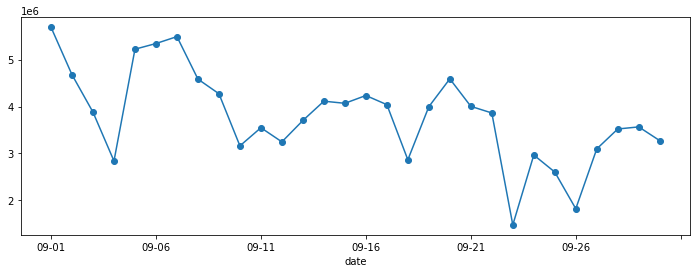

In [6]:
bikes_df.groupby("date").duration.sum().plot(marker = "o", figsize = (12,4))

## (2) Customer profile analysis
A mall has gathered data on their customers through a loyalty program. They have information about age, gender, annual income and spending score. Spending Score is a measure from 0 to 100, created for each customer based on customer behavior and purchasing data.

**(2.1) Import dataset <code>customers.csv</code> and use the column <code>CustomerID</code> as the index. Display the first five rows.**<br>
Hint: <code>index_col = "CustomerID"</code> or <code>index_col = [0]</code>.

In [7]:
customer_df = pd.read_csv("../dataset/customers.csv", index_col = [0])
customer_df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


**(2.2) Rename the columns according to the table below.**<br>

|column name| new column name|
|:-:|:-:|
|Gender|gender|
|Age|age|
|Annual Income (k$)|income|
|Spending Score (1-100)|spending_score|

In [8]:
customer_df.columns = ['gender', 'age', 'income', 'spending_score']

**(2.3) Use a histogram to show the income distribution.**

<AxesSubplot:ylabel='Frequency'>

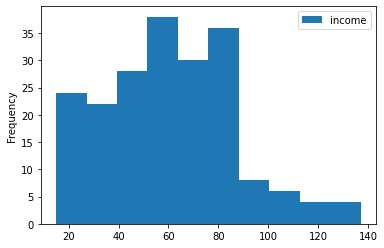

In [9]:
# solution-1
customer_df.plot(kind = "hist", y = "income")

<AxesSubplot:ylabel='Frequency'>

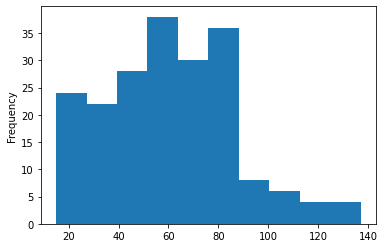

In [10]:
# solution-2
customer_df.income.plot(kind = "hist")

**(2.4) Use a scatter plot to show the relationship between income and spending_score.**

<AxesSubplot:xlabel='income', ylabel='spending_score'>

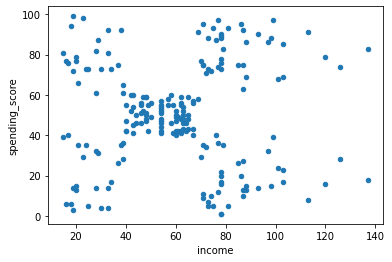

In [11]:
customer_df.plot(kind = "scatter", x= "income", y = "spending_score")

**(2.5) Use a scatter plot to show the relationship between income and spending_score. Color the points based on the column <code>age</code>.**

<AxesSubplot:xlabel='income', ylabel='spending_score'>

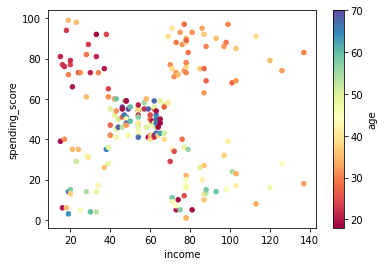

In [12]:
customer_df.plot(kind = "scatter", x= "income", y = "spending_score", c = "age", colormap = "Spectral", sharex = False)

**(2.6) Convert the age to age group according to the table below. Store the result in a new column named <code>age_group</code>.**<br>

|range| label|
|:-:|:-:|
|18-35| young adults|
|36-55| middle-aged adults|
|56-75| older adults |

In [13]:
customer_df["age_group"] = pd.cut(customer_df.age, 
                                  bins = [18,35,55,75],
                                  labels = ["young adults","middle-aged adults","older adults"], 
                                  include_lowest = True)

**(2.7) Count the number of customers in each age group. Display the results with a horizontal bar graph.**

<AxesSubplot:>

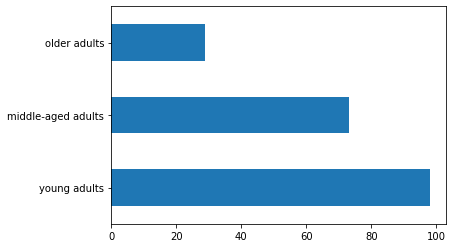

In [14]:
#solution-1
customer_df.age_group.value_counts().plot(kind = "barh")

<AxesSubplot:ylabel='age_group'>

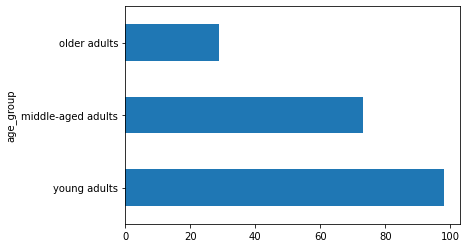

In [15]:
#solution-2
customer_df.groupby("age_group").size().plot(kind = "barh")

**(2.8) Group the data by columns <code>age_group</code> and <code>gender</code>. Count the number of customer in each group. Store the result in a dataframe called <code>customer_df_wide</code> in following format.**

||Female|Male|
|:-:|:-:|:-:|
|**young adults**|57|...|
|**middle-aged adults**|...|...|
|**older adults**|...|...|

In [16]:
# solution-1
customer_df_wide = customer_df.groupby(["age_group","gender"]).size().unstack()
customer_df_wide

gender,Female,Male
age_group,,
young adults,57,41
middle-aged adults,44,29
older adults,11,18


In [17]:
# solution-2 
# If "aggfunc = "count", you can use any column for the argument "values"
customer_df_wide = customer_df.pivot_table(index = "age_group", columns = "gender", values = "spending_score", aggfunc = "count")
customer_df_wide

gender,Female,Male
age_group,,
young adults,57,41
middle-aged adults,44,29
older adults,11,18


In [18]:
# solution-3  
# Without specifying "values" and "aggfunc", the method "crosstab" will calculate the frequency
customer_df_wide = pd.crosstab(index = customer_df["age_group"], columns = customer_df["gender"])
customer_df_wide

gender,Female,Male
age_group,,
young adults,57,41
middle-aged adults,44,29
older adults,11,18


**(2.10) Draw a stacked horizontal bar chart to show the number of customers in each age group. Each bar is stacked by two sub-bars: the number of male customers and the number of female customers.** 

<AxesSubplot:ylabel='age_group'>

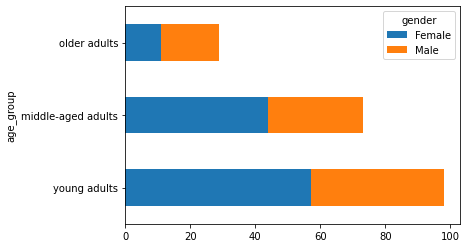

In [19]:
customer_df_wide.plot(kind = "barh", stacked = True)

## (3) Wine dataset
Description of each column
- **country**: The country that the wine is from
- **description**: A few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.
- **designation**: The vineyard within the winery where the grapes that made the wine are from
- **points**: The number of points WineEnthusiast rated the wine on a scale of 1-100
- **price**: The cost for a bottle of the wine
- **province**: The province or state that the wine is from
- **region_1**: The wine growing area in a province or state
- **region_2**: Sometimes there are more specific regions specified within a wine growing area, but this value can sometimes be blank
- **variety**: The type of grapes used to make the wine
- **winery**: The winery that made the wine

**(3.1) Import dataset <code>wine.csv</code> and set the first column as the index.** 

In [20]:
wine_raw_df = pd.read_csv("../dataset/wine.csv", index_col = [0])

**(3.2) Shows the top five grape types most commonly used to produce wine.**<br>
Hint: Use column <code>variety</code>.

In [21]:
# solution-1
wine_raw_df.variety.value_counts().head(5)

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
Name: variety, dtype: int64

In [22]:
# solution-2
wine_raw_df.groupby("variety").size().sort_values(ascending = False).head(5)

variety
Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
dtype: int64

**(3.3) Display the result obtained in (3.2) with a pie chart.**

<AxesSubplot:ylabel='variety'>

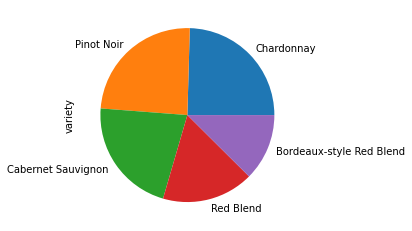

In [23]:
wine_raw_df.variety.value_counts().head(5).plot(kind = "pie")

**(3.4) Select a subset that meets all of the following criteria. Use this subset to solve the following tasks.**<br>
- Produced in Spain, Italy or France.
- The price is less than 200.
- Made from the following grape varieties: Chardonnay, Pinot Noir, Cabernet Sauvignon.

In [24]:
wine_df = wine_raw_df[(wine_raw_df.country.isin(["Spain","Italy","France"])&(wine_raw_df.price<200)&(wine_raw_df.variety.isin(["Chardonnay", "Pinot Noir", "Cabernet Sauvignon"])))]
wine_df.head(5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
51,France,"This structured, complex Chardonnay is packed ...",NaN,90,68.0,Burgundy,Chassagne-Montrachet,NaN,Chardonnay,Chartron et Trébuchet
53,France,"With its light color and cool feel, this well-...",L'Inédit,90,28.0,Loire Valley,Coteaux du Giennois,NaN,Pinot Noir,Clement et Florian Berthier
63,France,L'Homme Mort is a northern extension of the Fo...,L'Homme Mort Premier Cru,91,45.0,Burgundy,Chablis,NaN,Chardonnay,Domaine Chenevières
66,France,The steely character of a young Chablis is ver...,Fourchaume Premier Cru,91,38.0,Burgundy,Chablis,NaN,Chardonnay,Louis Max
76,France,"This wine is bone-dry, although with some age ...",Le Nombre d'Or Brut Nature,91,85.0,Champagne,Champagne,NaN,Chardonnay,Aubry


**(3.5) For those wines made from the grape variety "Pinot Noir", use a histogram to plot their distribution of <code>point</code>.**

<AxesSubplot:ylabel='Frequency'>

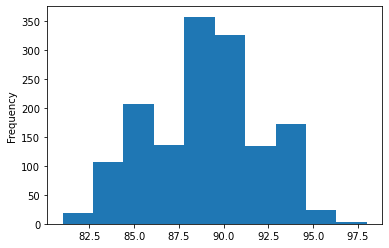

In [25]:
wine_df[wine_df.variety == "Pinot Noir"].points.plot(kind = "hist")

**(3.6) Use a horizontal bar chart to display the average price for each grape variety.**

<AxesSubplot:ylabel='variety'>

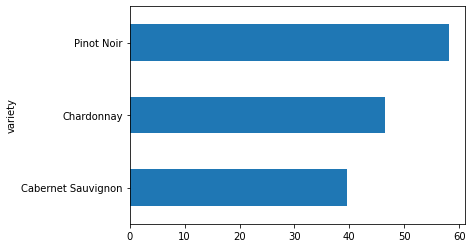

In [26]:
# solution-1
wine_df.groupby("variety").price.mean().plot(kind = "barh")

<AxesSubplot:ylabel='variety'>

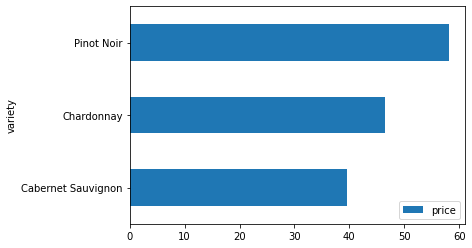

In [27]:
# solution-2
wine_df.pivot_table(index = "variety", values = "price", aggfunc = "mean").plot(kind = "barh", y = "price")

**(3.7) Calculate the average price of each grape variety by country.**

In [28]:
# solution-1
wine_df.groupby(["country", "variety"]).price.mean()

country  variety           
France   Cabernet Sauvignon    11.477273
         Chardonnay            50.222074
         Pinot Noir            59.107192
Italy    Cabernet Sauvignon    48.612150
         Chardonnay            32.188889
         Pinot Noir            15.714286
Spain    Cabernet Sauvignon    29.770270
         Chardonnay            15.626866
         Pinot Noir            18.483871
Name: price, dtype: float64

In [29]:
# solution-2
wine_df.pivot_table(index = "country", columns ="variety", values = "price", aggfunc = "mean")

variety,Cabernet Sauvignon,Chardonnay,Pinot Noir
country,,,
France,11.477273,50.222074,59.107192
Italy,48.612150,32.188889,15.714286
Spain,29.770270,15.626866,18.483871


**(3.8) Use a horizontal bar chart to display the result obtained in (3.7).**<br>
Hint: Use "country" as the xlable, and use the different colored bars to represent the varieties.

<AxesSubplot:ylabel='country'>

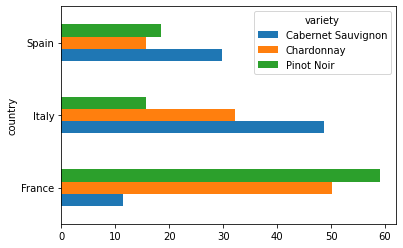

In [30]:
#solution-1
wine_df.groupby(["country", "variety"]).price.mean().unstack().plot(kind = "barh")

<AxesSubplot:ylabel='country'>

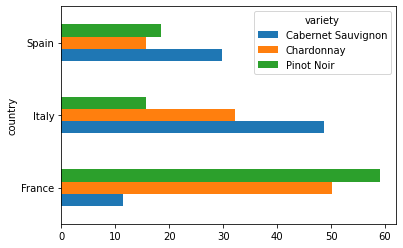

In [31]:
#solution-2
wine_df.pivot_table(index = "country", columns ="variety", values = "price", aggfunc = "mean").plot(kind = "barh")